<a id='task_3'></a>
## Задание 3 (когортный анализ)

Приведите в качестве решения скриншот с результатом, а также свои комментарии относительно предложенного решения (с указанием среды, в которой решали задания).  

В приложенном файле хранятся данные об активности клиентов с сентября 2021 года по февраль 2022  
Необходимо на основе этих данных провести когортный анализ  

Данные: https://raw.githubusercontent.com/Propsih/test/main/data_test.csv  

Описание полей: 
* CLIENT_ID - идентификатор клиента; 
* VALUE_DAY - отчетная дата; 
* DIGITAL_30_CNT - кол-во входов в мобильное приложение за последние 30 дней на отчетную дату; 
* TRAN_ACTIVE_30_CNT - кол-во транзакций в мобильном приложение за последние 30 дней на отчетную дату; 
* OPER_ACTIVE_30_CNT - кол-во операций (транзакции+нефинансовые операции) в мобильном приложение за последние 30 дней на отчетную дату

Задачи:

*	постройте визуальное представление удержания клиентов в статусе:  
    +	активных клиентов банка (наличие строки для клиента на отчетную дату);  
    +	диджитал активных (активных в мобильном приложении: наличие хотя бы одного входа);  
    +	операционно активных;  
    +	транзакционно активных;  
*	какие выводы можно сделать на основе этих данных?;  
*	если построить проникновение транзакционно активных клиентов в когорты диджитал активных клиентов, то мы увидим, что существенная часть клиентов  использует мобильное приложение, но не совершает транзакции (платежи и переводы) в нем. Какие гипотезы такого поведения можно предположить? Как их можно  проверить ?;  
*	как можно исправить эту ситуацию и увеличить проникновение транзакционно активных клиентов в диджитал активных?

<a id='task_3_EDA'></a>

## Данное задание буду решать при помощи языка программирования python3  
используемые библиотеки:  
- pandas - анализ данных и вычисления;  
- matplotlib и seaborn для визуализации.

весь код будет скрыт, с полной версией можно ознакомиться по ссылке: https://github.com/ArTimur/test_task/blob/main/alfa_test2.ipynb

## Приступим, загрузим и изучим данные:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

c:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
custom_date_parser = lambda x: datetime.strptime(x, "%d.%m.%Y")
df = pd.read_csv('https://raw.githubusercontent.com/Propsih/test/main/data_test.csv',
                  sep=";", parse_dates=['VALUE_DAY'], date_parser=custom_date_parser)

### посмотрим на несколько первых строк данных:

In [4]:
df.head(5)

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
0,3596869440,2021-09-30,18.0,8.0,9.0
1,181778433,2021-09-30,7.0,3.0,3.0
2,4271531990,2021-09-30,2.0,0.0,0.0
3,3949165697,2021-09-30,15.0,4.0,5.0
4,1926920317,2021-09-30,3.0,0.0,0.0


### что из себя представляет набор (кол-во и тип данных):

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805821 entries, 0 to 805820
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CLIENT_ID           805821 non-null  int64         
 1   VALUE_DAY           805821 non-null  datetime64[ns]
 2   DIGITAL_30_CNT      711169 non-null  float64       
 3   TRAN_ACTIVE_30_CNT  711169 non-null  float64       
 4   OPER_ACTIVE_30_CNT  711169 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 30.7 MB


### количество уникальных клиентов:

In [6]:
print(df.CLIENT_ID.nunique(), "клиента")

169092 клиента


### считаем пропущенные данные:

In [7]:
df.isna().sum()

CLIENT_ID                 0
VALUE_DAY                 0
DIGITAL_30_CNT        94652
TRAN_ACTIVE_30_CNT    94652
OPER_ACTIVE_30_CNT    94652
dtype: int64

### 94652 значения отсутствует. Похоже на то, что если данные отсутствуют по одному показателю, то их нет и по остальным. Но необходимо это проверить:  
### отфильтрую все пустые значения по столбцу "DIGITAL_30_CNT" (например)  и просуммирую все три показателя. 

In [8]:
df.query("DIGITAL_30_CNT.isna()")[['DIGITAL_30_CNT', 'TRAN_ACTIVE_30_CNT', 'OPER_ACTIVE_30_CNT']].sum()

DIGITAL_30_CNT        0.0
TRAN_ACTIVE_30_CNT    0.0
OPER_ACTIVE_30_CNT    0.0
dtype: float64

### Так как все данные показетелей равны нулю, то утверждаемся в мысли, что в датасете представленны:  
1) все клиенты банка, которые проявляют активность как оф, так и онлайн - все уникальные клиенты в датасете;  
2) клиенты, по которым есть показатели, - имеют установленное мобильное приложение.  
- могут в него заходить (DIGITAL_30_CNT);
- совершать транзакции (TRAN_ACTIVE_30_CNT);
- проводить нефинансовые операции (OPER_ACTIVE_30_CNT).
    


>У меня были сложности с интерпретацией задачи, т.к. я обнаружил, что есть клиенты, которые не заходили в мобильный банк в течении отчетного месяца, но при этом совершали транзакции/операции.  
Не могу понять как это возможно. Предположил, что транзакции и операции могли быть сделаны офлайн, но в описании полей указано - мобильное приложение.    

>После длительных рассуждений сделал допущения: либо я знаю не все (например, операцией может быть получение документа, заказанного ранее), либо есть ошибка в данных. С этим обязательно надо разбираться отдельно, тк от этого зависит корретность дальнейшего отчета и выводы.
Пример нестыковок:

In [9]:
df.groupby(['CLIENT_ID', 'VALUE_DAY']).sum().query("DIGITAL_30_CNT == 0 and (TRAN_ACTIVE_30_CNT > 0 or OPER_ACTIVE_30_CNT > 0)").head()

DIGITAL_30_CNT  TRAN_ACTIVE_30_CNT  OPER_ACTIVE_30_CNT
CLIENT_ID VALUE_DAY                                                         
17866400  2021-12-31             0.0                 1.0                 1.0
19677355  2022-01-31             0.0                 2.0                 2.0
20338831  2021-10-31             0.0                 1.0                 1.0
          2021-11-30             0.0                 1.0                 1.0
22256088  2021-09-30             0.0                 1.0                 1.0

In [10]:
print("всего таких записей", df.groupby(['CLIENT_ID', 'VALUE_DAY']).sum().query("DIGITAL_30_CNT == 0 and (TRAN_ACTIVE_30_CNT > 0 or OPER_ACTIVE_30_CNT > 0)").shape[0], "шт")
print("по уникальным клиентам в кол-ве", df.groupby(['CLIENT_ID', 'VALUE_DAY']).sum().query("DIGITAL_30_CNT == 0 and (TRAN_ACTIVE_30_CNT > 0 or OPER_ACTIVE_30_CNT > 0)").index.get_level_values(0).nunique(), "шт")

всего таких записей 2490 шт
по уникальным клиентам в кол-ве 1433 шт


In [11]:
# df2 = df.copy()

In [12]:
# df2['DIGITAL_30_True'] = np.where(df.DIGITAL_30_CNT > 0, True, False)
# df2['TRAN_ACTIVE_30_True'] = np.where(df.TRAN_ACTIVE_30_CNT > 0, True, False)
# df2['OPER_ACTIVE_30_True'] = np.where(df.OPER_ACTIVE_30_CNT > 0, True, False)
# df2

In [13]:
# df2.groupby(['VALUE_DAY'])[['DIGITAL_30_True', 'TRAN_ACTIVE_30_True', 'OPER_ACTIVE_30_True']].sum()

<a id='task_3_solution_v'></a>

## Построим визуальное представление удержания клиентов в статусе:  
- активных клиентов банка (наличие строки для клиента на отчетную дату);  
- диджитал активных (активных в мобильном приложении: наличие хотя бы одного входа);  
- операционно активных;  
- транзакционно активных; 

## Для этого выполним ряд расчетов:

1) Найдем дату первого взаимодействия каждого пользователя с системой (определим его когорту)  
2) Вычислим жизненный цикл когорты в месяцах для каждого пользователя (VALUE_DAY минус дата первого взаимодействия)  
3) Посчитаем кол-во пользователей на каждом жизненном цикле каждой когорты  
4) Определим первоначальный состав когорт  
5) Посчитаем retention по формуле: кол-во пользователей на определенном жизненном цикле когорты / кол-во пользователей в первоначальном составе когорты  

## Построим одну визуализацию для всех статусов, это облегчит восприятие и последующий анализ.
По оси X - retention по мес: 1 (окт 21) по 5 (февраль 22) (0 месяц пропущу, чтобы не нагружать график лишней информацией). Также отражу первоначальный размер когорты (coh size)  

По оси Y - когорты


In [14]:
def cohort_analysis(df: pd.DataFrame, title: str):
  # находим дату первого взаимодействия каждого пользователя с системой (определяем его когорту) и добавляем соотвествующий столбец
  df_reg = df.groupby("CLIENT_ID", as_index=False).agg({'VALUE_DAY' : 'min'})
  df_reg.columns = ['CLIENT_ID', 'registration_date']
  df_merged = df.merge(df_reg, how='left', on='CLIENT_ID')
  
  # вычисляем жизненный цикл когорты
  df_merged['cohort_lifetime'] = round((df_merged.VALUE_DAY - df_merged.registration_date)/np.timedelta64(1, 'M'), 0) \
    .astype(int)
  
  # считаем кол-во пользователей на каждом жизненном цикле каждой когорты
  cohorts = df_merged.pivot_table(index = ['registration_date','cohort_lifetime'], 
                                  aggfunc = {'CLIENT_ID':'nunique'}).reset_index()
  
  # определяем первоначальный состав когорты (кол-во клиентов)
  initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0]
  initial_users_count = initial_users_count[['registration_date','CLIENT_ID']]
  initial_users_count = initial_users_count.rename(columns={'CLIENT_ID':'cohort_users'})

  # считаем retention
  cohorts = cohorts.merge(initial_users_count,on='registration_date')
  cohorts['retention'] = cohorts['CLIENT_ID']/cohorts['cohort_users'] 
  retention_pivot = cohorts.pivot_table(index='registration_date',
                                        columns='cohort_lifetime',
                                        values='retention',
                                        aggfunc='sum') 
  
  return retention_pivot, initial_users_count

In [15]:
# считаем retention для 
cohort_active = cohort_analysis(df, 'active')[0]
cohort_digital_active = cohort_analysis(df.query('DIGITAL_30_CNT > 0'), 'digital active')[0]
cohort_oper_active = cohort_analysis(df.query('OPER_ACTIVE_30_CNT > 0'), 'oper active')[0]
cohort_trans_active = cohort_analysis(df.query('TRAN_ACTIVE_30_CNT > 0'), 'trans active')[0]

In [16]:
# размер каждой когорты в разрезах типа клиентов
cohort_active_size = cohort_analysis(df, 'active')[1].cohort_users[:-1]
cohort_digital_active_size = cohort_analysis(df.query('DIGITAL_30_CNT > 0'), 'digital active')[1].cohort_users[:-1]
cohort_oper_active_size = cohort_analysis(df.query('OPER_ACTIVE_30_CNT > 0'), 'oper active')[1].cohort_users[:-1]
cohort_trans_active_size = cohort_analysis(df.query('TRAN_ACTIVE_30_CNT > 0'), 'trans active')[1].cohort_users[:-1]

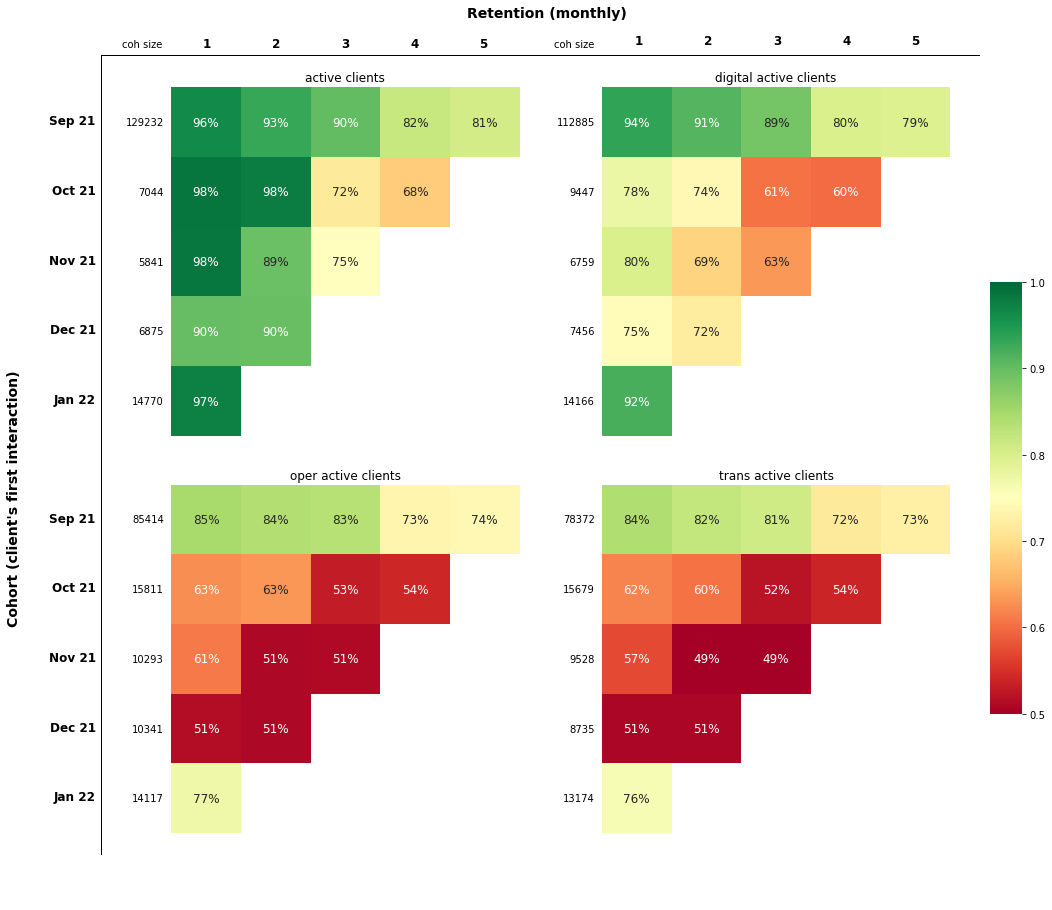

In [17]:
f, axs = plt.subplots(2, 2, sharex=True, figsize=(15, 15))
# plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
f.text(0.5, .945, 'Retention (monthly)', ha='center', fontsize=14, fontweight='bold')
f.text(.0, .5, 'Cohort (client\'s first interaction)', va='center', fontsize=14, rotation='vertical', fontweight='bold')
f.add_artist(plt.Line2D([0.087, .90], [0.91, 0.91], color='black', lw=1))
f.add_artist(plt.Line2D([0.087, 0.087], [0.17, .91], color='black', lw=1))

for i in range(2):
  f.text(i * .4 + .125, .917, 'coh size', ha='center', fontsize=10)

month = [1, 2, 3, 4, 5]
for i in range(len(month)):
  f.text(i * .064 + .185, .917, month[i], ha='center', fontsize=12, fontweight='bold')

for i in range(len(month)):
  f.text(i * .064 + .585, .92, month[i], ha='center', fontsize=12, fontweight='bold')  

month_coh = ['Sep 21', 'Oct 21', 'Nov 21', 'Dec 21', 'Jan 22'][::-1]
for i in range(5):
  f.text(.082, i * .0645 + .223,  month_coh[i], ha='right', va='center', fontsize=12, fontweight='bold')

for i in range(5):
  f.text(.082, i * .0645 + .591, month_coh[i], ha='right', va='center', fontsize=12, fontweight='bold')  


plt.yticks(rotation=0) 
yticks = cohort_active.index[:-1].strftime('%Y-%m-%d')
g1 = sns.heatmap(cohort_active.iloc[:, 1:], cmap='RdYlGn', cbar=True, cbar_ax=f.add_axes([.91, .3, .03, .4]), ax=axs[0, 0], yticklabels=cohort_active_size, annot=True, square=True, vmin=0.5, vmax=1, fmt='.0%', annot_kws={"fontsize":12})
g1.set_title('active clients')
g1.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, left=False, labeltop=False)
g1.set_ylabel('')
g1.set_xlabel('')
g1.set_yticklabels(g1.get_yticklabels(), rotation=0)

g2 = sns.heatmap(cohort_digital_active.iloc[:, 1:], cmap='RdYlGn', cbar=False, ax=axs[0, 1], yticklabels=cohort_digital_active_size, annot=True, square=True, vmin=0.5, vmax=1, fmt='.0%', annot_kws={"fontsize":12})
g2.set_title('digital active clients')
g2.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, left=False, labeltop=False)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticklabels(g2.get_yticklabels(), rotation=0)

g3 = sns.heatmap(cohort_oper_active.iloc[:, 1:],  cmap='RdYlGn', cbar=False, ax=axs[1, 0], yticklabels=cohort_oper_active_size, annot=True, square=True, vmin=0.5, vmax=1, fmt='.0%', annot_kws={"fontsize":12})
g3.set_title('oper active clients')
g3.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, left=False, labeltop=False)
g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticklabels(g3.get_yticklabels(), rotation=0)

g4 = sns.heatmap(cohort_trans_active.iloc[:, 1:],  cmap='RdYlGn', cbar=False, ax=axs[1, 1], yticklabels=cohort_trans_active_size, annot=True, square=True, vmin=0.5, vmax=1, fmt='.0%', annot_kws={"fontsize":12})
g4.set_title('trans active clients')
g4.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, left=False, labeltop=False)
g4.set_ylabel('')
g4.set_xlabel('')
g4.set_yticklabels(g4.get_yticklabels(), rotation=0)

plt.subplots_adjust(hspace=-0.05, wspace=0.06)
plt.show()

<a id='task_3_solution_output'></a>

## Выводы на основе визуализации данных:

В сентябре пришло самое большое кол-во пользователей, это прослеживается по всем типам активности. По сравнению с остальными периодами отличие в среднем грубо x7 - x15.  
Также retention по сентябрьской когорте самый высокий.  

Такие явные отклонения могут свидетельствовать о крупной маркетинговой компании в сентябре 21г по привлечению клиентов совместно с партнерами банка. В программе, вероятно, пользователям предоставлялись материальные поощрения при использовании моб. приложения (скидки/пониженные тарифы/повышенный кешбек/переводы без комиссии/беспроцентные рассрочки/скидки у партнеров и пр.) c длительным периодом действия - судя по retention от 5 месяцев и далее.  
Это косвенно подтверждается операционной и транзакционной активностью пользователей сентябрьской когорты в последующие месяцы.

Судя по тому, что у когорт, начиная с октября, резко снижается удержание в мобильном приложении, можно предположить, что кампания закончилась и клиенты, пришедшие в эти периоды, не мотивированы на его использование для совершения каких-либо операций. В лучшем случае клиенты просто проверяют баланс - это можно предположить исходя из того, что диджитал активность заметно выше, чем транзакционная и оперативная.

В дополнение к этому можно предположить, что у приложения есть проблемы с UX/UI дизайном, или есть зависания, ошибки. Клиенты готовы с этим мириться только с учетом материальной выгоды, в противном случае они довольствуются офлайн услугами - ретеншн активных пользователей не так драматично изменяется.  
В январьской когорте заметно улучшение показателя по всем статусам клиентов + рост самой кагорты - возможно, были внесены исправления в работу приложения, но данные за один месяц не позволяют делать такие выводы.

Для подтверждения, опровержения и выработки новых гипотез необходима доп. информация от подразделений банка, отвечающих за маркетинговые компании, поддержку клиентов, и развитие мобильного приложения. Стоит выяснить портрет пользователя: возраст, пол, и прочие.

<a id='task_3_solution_output2'></a>
## Существенная часть клиентов  использует мобильное приложение, но не совершает транзакции (платежи и переводы) в нем.  
<a id='task_3_solution_output21'></a>
### Какие гипотезы такого поведения можно предположить?  
- Клиенты используют приложение только для просмотра информации о своем балансе или услугах банка, но для совершения транзакций предпочитают другие каналы;  
- Высокие комиссии за транзакции/операции;  
- Некоторые клиенты не имеют необходимых на данный момент финансовых операций, но сохраняют приложение для будущих транзакций;  
- Проблемы UX/UI (неудобный, непонятный интерфейс), технические проблемы (баги, зависания, медленное выполнение операций и прочее), высокие требования к скорости интернета;  
- Клиенты не доверяют безопасности приложения.  

<a id='task_3_solution_output22'></a>
### Как их можно проверить?  
- Исследовать поведение клиентов внутри приложения (Amplitude, Google Analytics, Y Metrica и прочие), чтобы выяснить, на каких этапах они отказываются от совершения транзакций;  
- Анализировать данные о проблемах, связанных с использованием приложения, о которых пользователи сообщают в службу поддержки;  
- Исследовать рынок и провести анализ конкурентов, чтобы выяснить, какие функции, услуги предоставляют другие приложения банков, которые клиенты могут использовать как альтернативу, сравнить тарифную политику;  
- Провести тестирование пользовательского интерфейса (AB тесты): может помочь понять, как пользователи взаимодействуют с приложением и насколько легко им пользоваться.
- Провести опрос среди клиентов, чтобы выяснить, почему они используют приложение, но не совершают в нем транзакции.  

<a id='task_3_solution_output23'></a>
### Как можно исправить эту ситуацию и увеличить проникновение транзакционно активных клиентов в диджитал активных?  
- Улучшить пользовательский интерфейс (UX/UI), наладить процесс оптимизации интерфейса и предоставить более полезные функции;  
- Предоставить бонусы, скидки и боле востребованные партнерские программы по сравнению с конкурентами;
- Реклама и маркетинг: Чтобы привлечь больше клиентов, необходимо проводить рекламные и маркетинговые кампании. Можно использовать различные каналы, такие как социальные сети и поисковые системы, чтобы привлечь новых клиентов и повысить осведомленность о диджитал активах.
